In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pymc3 import Model, DiscreteUniform, Poisson, Exponential
from pymc3.math import switch

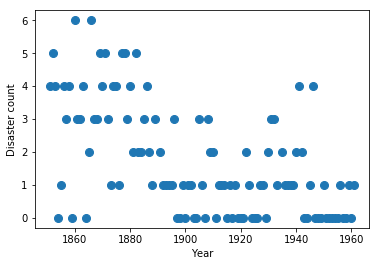

In [4]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
year = np.arange(1851, 1962)

plt.plot(year, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year")

In [5]:
with Model() as disaster_model:
    switchpoint = DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)
    
    early_rate = Exponential('early_rate', 1)
    late_rate = Exponential('late_rate', 1)
    
    rate = switch(switchpoint >= year, early_rate, late_rate)
    
    disasters = Poisson('disasters', rate, observed=disaster_data)

In [13]:
from pymc3 import NUTS, Metropolis, sample, traceplot

In [11]:
with disaster_model:
    trace = sample(10000)

/Users/libland/miniconda2/lib/python2.7/site-packages/pymc3/sampling.py:234: UserWarning: Automatic initialization is not supported for discrete variables. Ignoring init argument.
  warnings.warn('Automatic initialization is not supported '
Assigned Metropolis to switchpoint
Assigned NUTS to early_rate_log_
Assigned NUTS to late_rate_log_
Assigned Metropolis to disasters_missing
100%|█████████▉| 9996/10000 [01:02<00:00, 161.20it/s]/Users/libland/miniconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/Users/libland/miniconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:244: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 3
  if np.any(diverging[~tuning]):
/Users/libl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1ca550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dadd890>]], dtype=object)

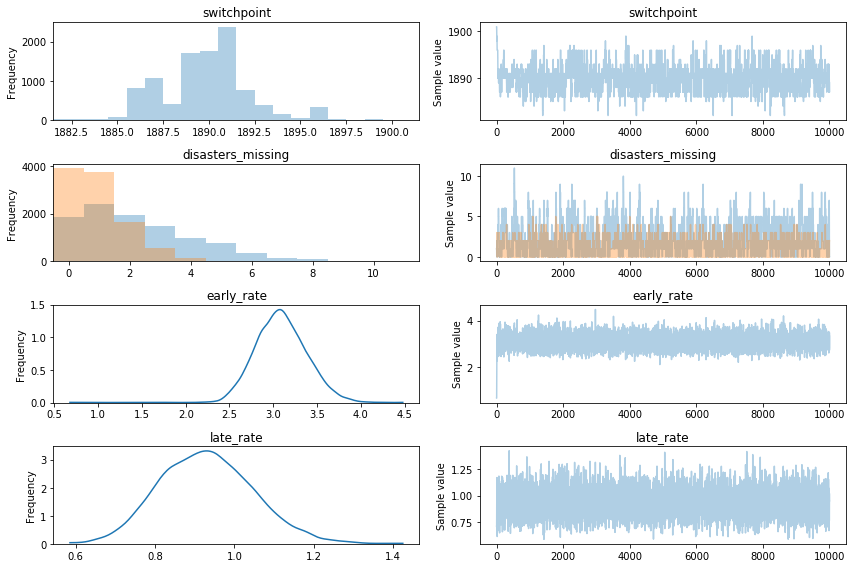

In [14]:
traceplot(trace)